In [39]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [40]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/Project/'
zDfil='geopot.dat'
uDfil='uwind.dat'
vDfil='vwind.dat'
topo_file = "topo.dat"

In [41]:
ntime=3
nx=13
ny=5
recl=(nx*ny)*4
z_bin=np.zeros((ntime,nx,ny))
u_bin=np.zeros((ntime,nx,ny))
v_bin=np.zeros((ntime,nx,ny))
topo_bin=np.zeros((ny,nx))

In [42]:
ds_topo_bin = open(dirin+topo_file,'rb')

tmp = ds_topo_bin.read(recl)
tmp1 = array('f',tmp)
#tmp2=tmp1[1:-1] #for fortran sequential
ds_topo_bin=np.reshape(tmp1,(ny,nx))

In [43]:
ds_z_bin = open(dirin+zDfil,'rb')
for t in range(ntime):
    tmp = ds_z_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    z_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_z_bin,tmp,tmp1

In [47]:
ds_u_bin = open(dirin+uDfil,'rb')
for t in range(ntime):
    tmp = ds_u_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    u_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_u_bin,tmp,tmp1

In [48]:
ds_v_bin = open(dirin+vDfil,'rb')
for t in range(ntime):
    tmp = ds_v_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    v_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_v_bin,tmp,tmp1

In [68]:
# calculate time mean
z_bin_mean = z_bin[1:2,:,:].mean(axis=0)
u_bin_mean = u_bin[1:2,:,:].mean(axis=0)
v_bin_mean = v_bin[1:2,:,:].mean(axis=0)

Text(0.5, 1.0, 'gh snapshot')

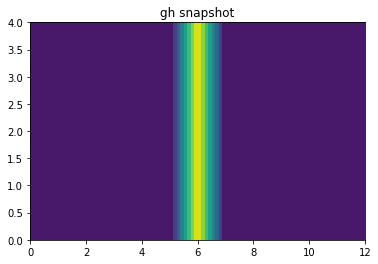

In [69]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contourf(ds_topo_bin)
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'gh t=0')

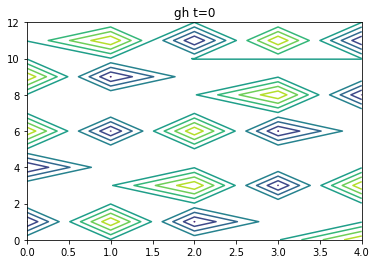

In [70]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin[1,:,:])
ax.set_title('gh t=0')

In [71]:
z_bin[1,:,:]

array([[49050.00390625, 49050.00390625, 49050.00390625, 49050.00390625,
        88290.        ],
       [ 9810.        , 88290.        ,  9810.        , 49050.00390625,
        49050.00390625],
       [49050.00390625, 49050.00390625, 49050.00390625, 49050.00390625,
        49050.00390625],
       [49050.00390625, 49050.00390625, 88290.        ,  9810.        ,
        88290.        ],
       [ 9810.        , 49050.00390625, 49050.00390625, 49050.00390625,
        49050.00390625],
       [49050.00390625, 49050.00390625, 49050.00390625, 49050.00390625,
        49050.00390625],
       [88290.        ,  9810.        , 88290.        ,  9810.        ,
        49050.00390625],
       [49050.00390625, 49050.00390625, 49050.00390625, 49050.00390625,
        49050.00390625],
       [49050.00390625, 49050.00390625, 49050.00390625, 88290.        ,
         9810.        ],
       [88290.        ,  9810.        , 49050.00390625, 49050.00390625,
        49050.00390625],
       [49050.00390625, 49050.

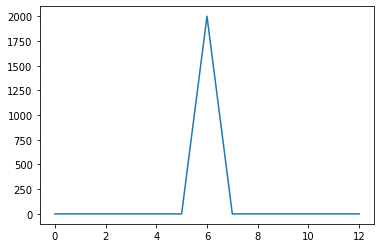

In [72]:
fig, ax = plt.subplots()
zc = ax.plot(ds_topo_bin[0,:])

TypeError: Length of x (144) must match number of columns in z (5)

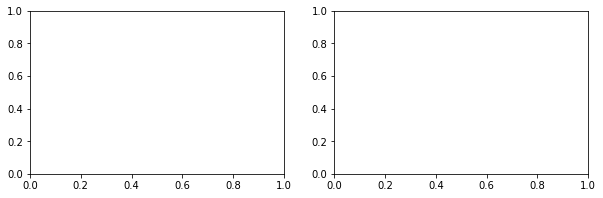

In [73]:
x=np.arange(0,360,2.5)
y=np.arange(-90,90,2.5)
fig, ax = plt.subplots(1,2,figsize=(10,3))
zc = ax[0].contour(x,y,z_bin[-1,:,:])
ax[0].set_title('gh snapshot')
zc_mean = ax[1].contour(x,y,z_bin_mean)
ax[1].set_title('gh time mean')

Text(0.5, 1.0, 'gh time mean')

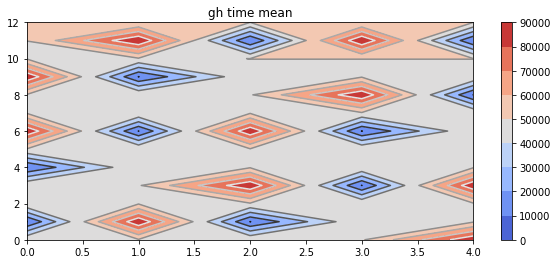

In [74]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

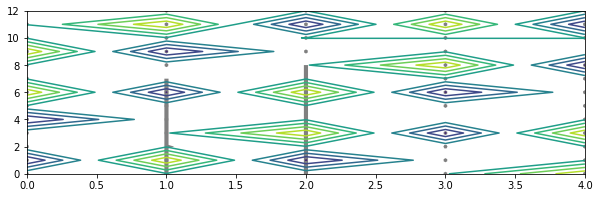

In [76]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean)
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nx)
y=np.arange(ny)
zc = ax.quiver(u_bin_mean, v_bin_mean,color='grey')
